## In this notebook, I plot of the observations above a world map. 

### Each observation (row) has been generated by one buoy. The information about the latitude and longitude of each observation give us the possibility to map the observations made by location.

### Import libraries

In [2]:
# Needed to avoid an error when importing Basemap
import os
os.environ['PROJ_LIB'] = r'/home/atwenter/anaconda3/pkgs/proj4-5.2.0-he6710b0_1/share/proj'

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import folium 

### Import and check the data

In [47]:
data = pd.read_csv('../Data/enso_data_cleaned.csv')

In [48]:
data.head()

obs  year  month  day        date  latitude  longitude  zon.winds  \
0    1  1980      3    7  1980-03-07     -0.02    -109.46       -6.8   
1    2  1980      3    8  1980-03-08     -0.02    -109.46       -4.9   
2    3  1980      3    9  1980-03-09     -0.02    -109.46       -4.5   
3    4  1980      3   10  1980-03-10     -0.02    -109.46       -3.8   
4    5  1980      3   11  1980-03-11     -0.02    -109.46       -4.2   

   mer.winds  humidity  air temp.  s.s.temp.  
0        0.7       NaN      26.14      26.24  
1        1.1       NaN      25.66      25.97  
2        2.2       NaN      25.69      25.28  
3        1.9       NaN      25.57      24.31  
4        1.5       NaN      25.30      23.19

## Create a new dataframe that only contains the coordinates

In [5]:
location = data[['latitude', 'longitude']]

### Plot the location of each observation by Seaborn library

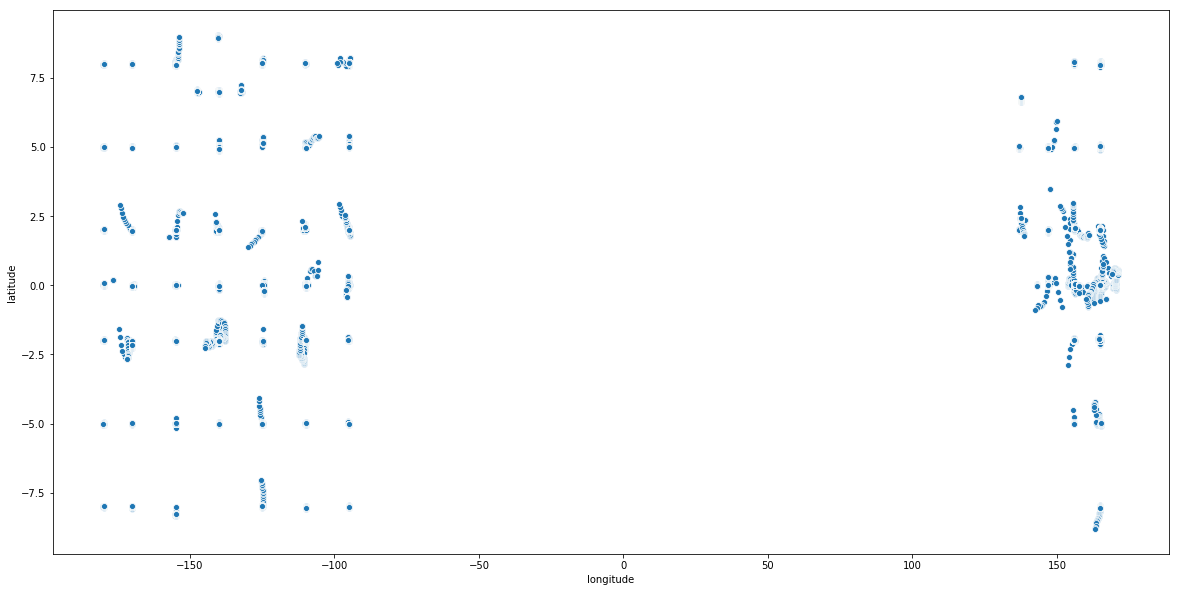

In [49]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x=location['longitude'], y=location['latitude'])

## Plot the location of each observation with Basemap library

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


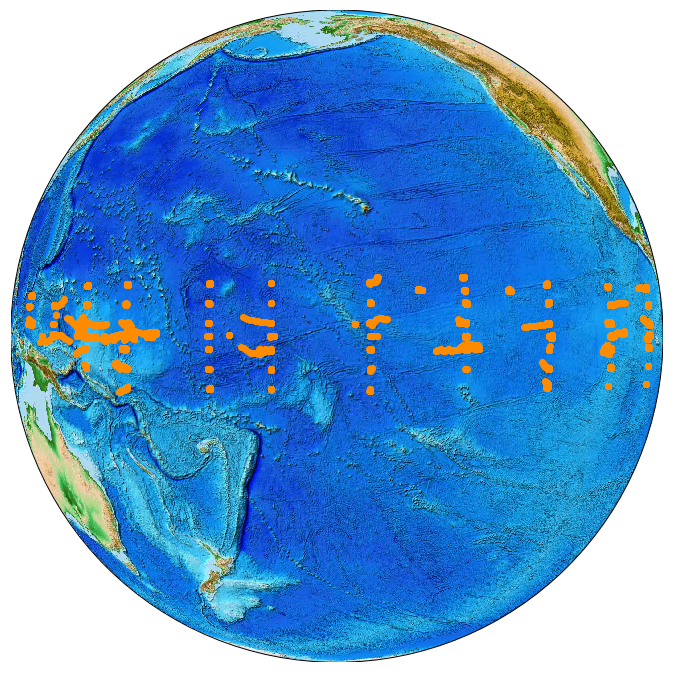

In [50]:
## Geostationary projection with terrain layer.

plt.figure(figsize=(12, 12))
m = Basemap(projection='geos',
            resolution=None,lat_0=0,lon_0= -160)
m.etopo()

lon = list(location['longitude'])
lat = list(location['latitude'])

x, y = m(lon, lat)

m.scatter(x, y, marker='o',color='darkorange')


plt.show()


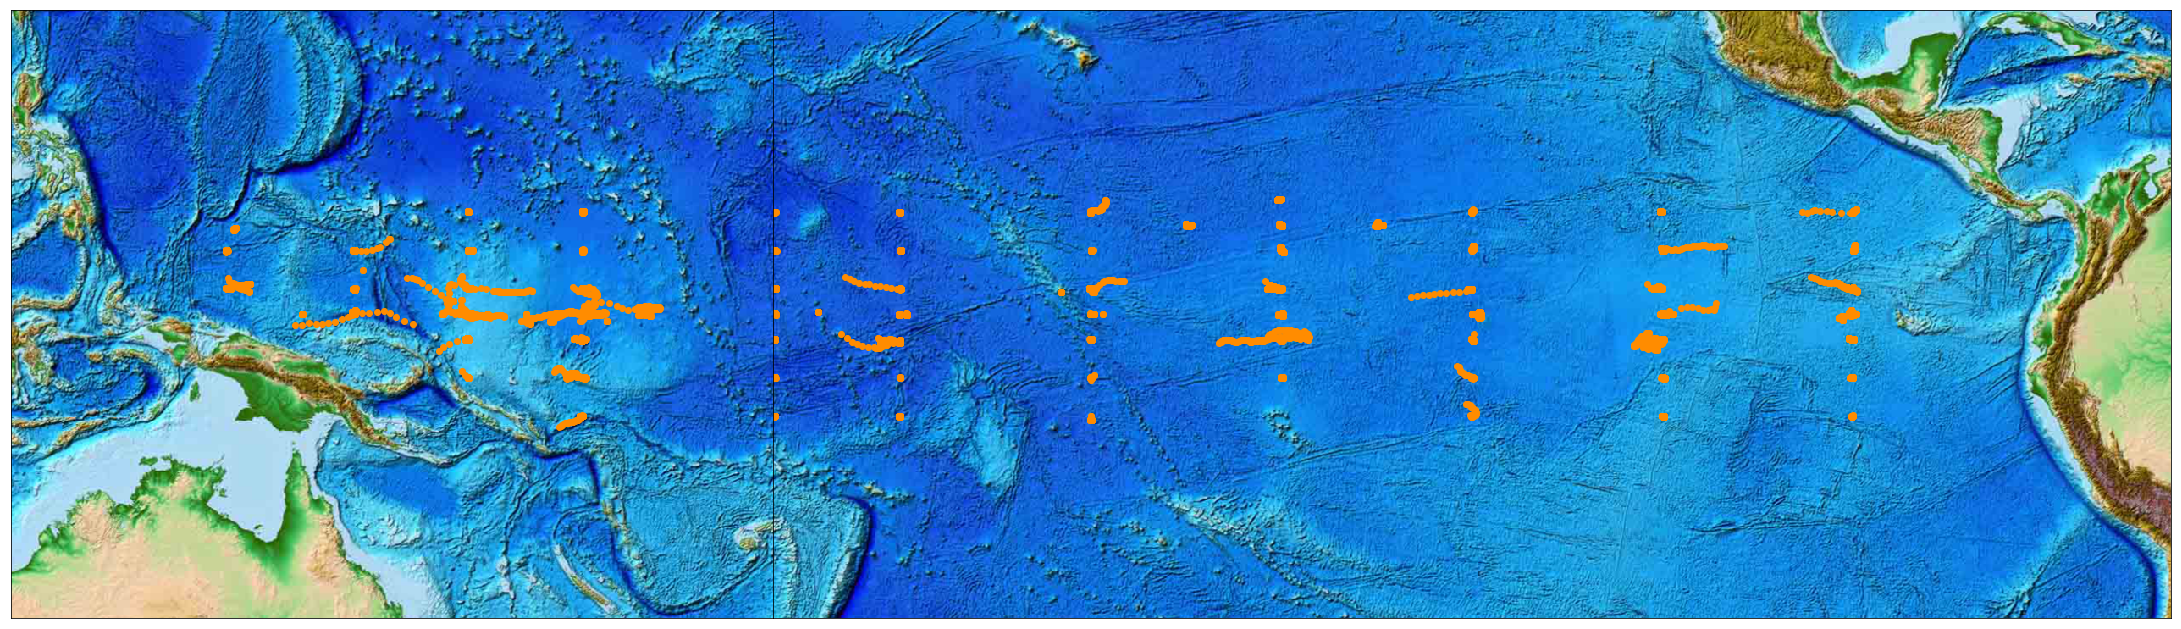

In [51]:
## Mercator projection.

## I couldn't find the way to plot one map centered in the Pacific Ocean, 
## so here I plot two joint maps to represent each observation.

fig=plt.figure()
fig.set_size_inches((30, 30))

ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)


m = Basemap(projection='merc',llcrnrlat=-23.27,urcrnrlat=23.27,\
            llcrnrlon=120,urcrnrlon=180,lat_ts=0,resolution='c', \
           ax= ax1)

m.etopo(ax = ax1)
ax1.set_position([0, 0, 60/170, 1])

p =  Basemap(projection='merc',llcrnrlat=-23.27,urcrnrlat=23.27,\
            llcrnrlon=-180,urcrnrlon=-70,lat_ts=0,resolution='c', \
            ax = ax2)


p.etopo(ax = ax2)
ax2.set_position([60/170, 0, 1-60/170, 1])



lon = list(location['longitude'])
lat = list(location['latitude'])

x, y = m(lon, lat)

x2, y2 = p(lon, lat)

m.scatter(x, y, marker='o',color='darkorange')
p.scatter(x2, y2, marker='o',color='darkorange')



plt.show()

In [ ]:
# look for alpha, for density.

## Other discarded representations

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


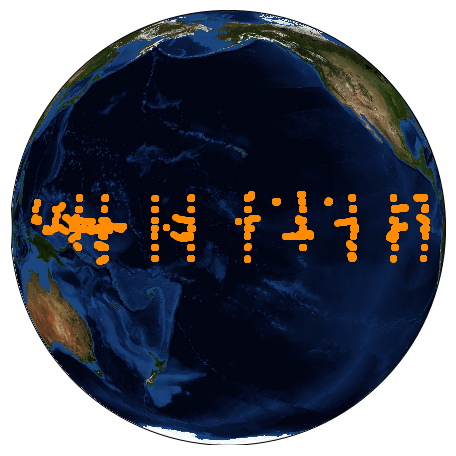

In [52]:
## Geostationary projection with real satellite photos.

plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=0, lon_0=-160)
m.bluemarble(scale=0.5)

lon = list(location['longitude'])
lat = list(location['latitude'])

x, y = m(lon, lat)

m.scatter(x, y, marker='o',color='darkorange')


In [1]:
## Folium library to obtain an interactive map.

## I discard it because it does not provide terrain information of the ocean and thus, it looked uglier. 



m = folium.Map(location=[0, -130],
                    tiles='Stamen Terrain',
                    zoom_start = 3)

lon = list(location['longitude'])
lat = list(location['latitude'])

#x, y = m(lon, lat)

for i in range(0, len(lat)):
    folium.Marker([lon[i], lat[i]]).add_to(m)
  

m

NameError: name 'folium' is not defined

In [42]:
len(lat)

178080

In [43]:
lon[2]

-109.46